In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from sklearn import preprocessing

In [2]:
data=pd.read_excel("Data.xlsx")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15267 entries, 0 to 15266
Data columns (total 29 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   career                                                                    15267 non-null  int32  
 1   gravidity times                                                           15267 non-null  int32  
 2   parity                                                                    15267 non-null  int32  
 3   weight gain（kg）                                                           15267 non-null  float64
 4   macrosomia history                                                        15267 non-null  int32  
 5   spontaneous abortion history                                              15267 non-null  int32  
 6   therapeutic induced labor because of stillbirth or birth defec

In [79]:
data['BMI when labor (kg/m2)'].unique()

array([1, 0, 3, 2])

In [5]:
label_encoder=preprocessing.LabelEncoder()

In [78]:
data['BMI when labor (kg/m2)']= label_encoder.fit_transform(data['BMI when labor (kg/m2)'])

In [63]:
#data['parity'] = data['parity'].astype('str') 

In [80]:
data = data.drop(['group'], axis=1)

In [82]:
data.to_csv("encoded_data.csv")

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15267 entries, 0 to 15266
Data columns (total 28 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   career                                                                    15267 non-null  int32  
 1   gravidity times                                                           15267 non-null  int32  
 2   parity                                                                    15267 non-null  int32  
 3   weight gain（kg）                                                           15267 non-null  float64
 4   macrosomia history                                                        15267 non-null  int32  
 5   spontaneous abortion history                                              15267 non-null  int32  
 6   therapeutic induced labor because of stillbirth or birth defec

In [85]:
# import pickle
# with open('FetalHealthClassificationFinal','wb') as f:
#     pickle.dump(model,f)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scaling the Data 
## Defining independent and dependent attributes in training and test sets

In [88]:
X=data.drop(["PTB"],axis=1)
y=data["PTB"]

0        0
1        0
2        0
3        0
4        0
        ..
15262    0
15263    0
15264    0
15265    0
15266    0
Name: PTB, Length: 15267, dtype: int32

## Setting up a standard scaler for the features and analyzing it thereafter

In [95]:
col_names=list(X.columns)
s_sclaler=StandardScaler()
X_scaled=s_sclaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
career,15267.0,-5.927034e-15,1.000033,-2.072956,0.099017,0.099017,0.099017,4.442963
gravidity times,15267.0,6.400308e-17,1.000033,-1.098609,-1.098609,0.109347,1.317302,1.317302
parity,15267.0,-1.855586e-15,1.000033,-0.846721,-0.846721,-0.846721,1.181026,1.181026
weight gain（kg）,15267.0,-1.098842e-15,1.000033,-3.711095,-0.803845,-0.132942,0.426145,28.268651
macrosomia history,15267.0,-2.116634e-15,1.000033,-0.175068,-0.175068,-0.175068,-0.175068,5.712071
spontaneous abortion history,15267.0,-7.513113e-16,1.000033,-0.373267,-0.373267,-0.373267,-0.373267,2.679046
therapeutic induced labor because of stillbirth or birth defects history,15267.0,-1.241623e-15,1.000033,-0.104526,-0.104526,-0.104526,-0.104526,9.566989
educational level,15267.0,2.421605e-15,1.000033,-2.313351,-0.873859,0.565632,0.565632,0.565632
residence,15267.0,-7.254766e-15,1.000033,-1.993636,0.501596,0.501596,0.501596,0.501596
family history of diabetes mellitus,15267.0,-7.583982e-15,1.000033,-0.199966,-0.199966,-0.199966,-0.199966,5.000852


## MODEL BUILDING

## Splitting Train & Test Set

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=25)

# Model Selection
## Building pipelines of model for various classifiers


In [98]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression())])
pipeline_dt=Pipeline([('dt_classifir',DecisionTreeClassifier())])
pipeline_gbcl=Pipeline([('gbcl_classifier',GradientBoostingClassifier())])
pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])
pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

In [99]:
#list of all pipelines
pipelines=[pipeline_lr,pipeline_dt,pipeline_gbcl,pipeline_rf,pipeline_knn]

In [100]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict={0:'Logistic Regression',1:'Decision Tree',2: 'Gradient Boost',3:'RandomForest', 4: 'KNN'}

In [102]:
# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(X_train,y_train)

C:\Users\hii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
cv_result_accuracy=[]
for i,model in enumerate(pipelines):
    cv_score=cross_val_score(model,X_train,y_train,cv=12)
    cv_result_accuracy.append(cv_score)
    print("%s: %f" %(pipe_dict[i],cv_score.mean()))

C:\Users\hii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hii\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Logistic Regression: 0.914845
Decision Tree: 0.855070
Gradient Boost: 0.916646
RandomForest: 0.911487
KNN: 0.902317


### Gradient Boost among the five models performs best with our data so we shall proceed with it.

In [105]:
# Baseline model of gradient boosting classifier with default parameters:

In [106]:
gbcl = GradientBoostingClassifier()
gbcl_model = gbcl.fit(X_train, y_train)
print(f"Baseline Gradient Boosting Classifier Score:{round(gbcl_model.score(X_test, y_test), 2)}")
pred_gbcl = gbcl_model.predict(X_test)

Baseline Gradient Boosting Classifier Score:0.92


In [107]:
# Cross validate Gradient Boosting Classifier model
scores_gbcl = cross_val_score(gbcl, X_train, y_train, cv = 8, n_jobs = 2, scoring = "accuracy")

print(f"CV scores for Gradient Boosting Classifier model:\n{scores_gbcl}")
print(f"CV Mean score: {round(scores_gbcl.mean(), 2)}")

CV scores for Gradient Boosting Classifier model:
[0.91683039 0.91748527 0.90962672 0.91421087 0.92075966 0.92005242
 0.91612058 0.9180865 ]
CV Mean score: 0.92


## lets grid search gradiant boosting

In [109]:
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [200, 350, 500, 750],
              "max_depth": [3, 6, 8]
              }

In [110]:
GridSearchCV_gbcl = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=parameters, 
                                cv=2,
                                verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [112]:
GridSearchCV_gbcl.fit(X_train, y_train);

Fitting 2 folds for each of 84 candidates, totalling 168 fits


C:\Users\hii\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [113]:
best_parameters = GridSearchCV_gbcl.best_params_
print(f"Best parameters for the model:\n{best_parameters}")

Best parameters for the model:
{'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 200}


# Testing stage

In [114]:
# Testing with the best parameters, 

gbcl = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=0.1, loss="deviance", 
                                  max_depth=6, max_features="log2", min_samples_leaf=0.3, 
                                  min_samples_split=0.5, n_estimators=500, random_state=25)


In [115]:
gbcl_mod = gbcl.fit(X_train, y_train)
pred_gbcl = gbcl_mod.predict(X_test)

score_gbcl_train = gbcl_mod.score(X_train, y_train)
score_gbcl_test = gbcl_mod.score(X_test, y_test)

C:\Users\hii\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [116]:
print(f"r^2(coefficient of determination) on training set = {round(score_gbcl_train, 3)}")
print(f"r^2(coefficient of determination) on testing set = {round(score_gbcl_test, 3)}")

r^2(coefficient of determination) on training set = 0.908
r^2(coefficient of determination) on testing set = 0.91


In [117]:
# Getting score on the Test set, 

pred_gbcl = pipeline_gbcl.predict(X_test)
accuracy = accuracy_score(y_test, pred_gbcl)
print(f" Testing Score of the model is {accuracy}")

 Testing Score of the model is 0.9161755075311068


In [118]:
# Getting the Classification report 
print(classification_report(y_test, pred_gbcl))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2780
           1       0.59      0.22      0.32       274

    accuracy                           0.92      3054
   macro avg       0.76      0.60      0.64      3054
weighted avg       0.90      0.92      0.90      3054



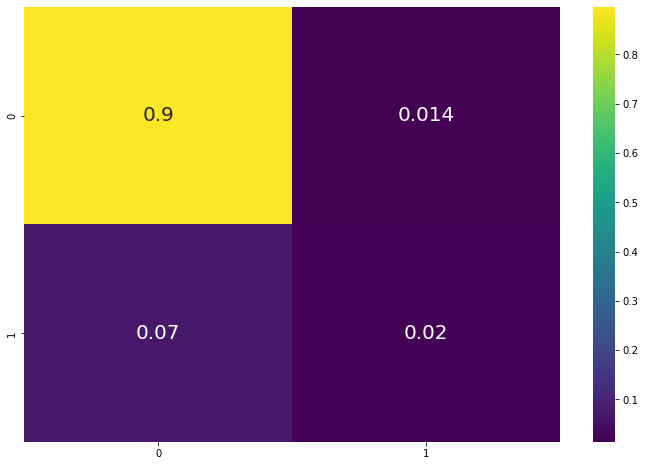

In [119]:
# Getting the Confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_gbcl)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis',annot = True, annot_kws = {'size':20})
plt.show()

In [121]:
#from tensorflow import keras

# 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 200

In [124]:
# using best parameters


gbcl_1 = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=0.05, loss="deviance", 
                                  max_depth=3, max_features="log2", min_samples_leaf=0.3, 
                                  min_samples_split=0.2, n_estimators=200, random_state=20)
gbcl_mod_1 = gbcl_1.fit(X_train, y_train)
pred_gbcl_1 = gbcl_mod_1.predict(X_test)

score_gbcl_train_1 = gbcl_mod_1.score(X_train, y_train)
score_gbcl_test_1 = gbcl_mod_1.score(X_test, y_test)
print(f"r^2(coefficient of determination) on training set = {round(score_gbcl_train_1, 3)}")
print(f"r^2(coefficient of determination) on testing set = {round(score_gbcl_test_1, 3)}")

C:\Users\hii\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


r^2(coefficient of determination) on training set = 0.908
r^2(coefficient of determination) on testing set = 0.91


In [125]:
pred_gbcl_1 = pipeline_gbcl.predict(X_test)
accuracy = accuracy_score(y_test, pred_gbcl_1)
print(f" Testing Score of the model is {accuracy}")

 Testing Score of the model is 0.9161755075311068


In [133]:
a=X_train.iloc[1].tolist()
a

[2.0,
 2.0,
 1.0,
 11.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 160.0,
 68.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0]

In [136]:
new_input =["2.0",
 "2.0",
 "1.0",
 "11.0",
 "0.0",
 "0.0",
 "0.0",
 "0.0",
 "1.0",
 "0.0",
 "160.0",
 "68.0",
 "0.0",
 "0.0",
 "0.0",
 "0.0",
 "0.0",
 "0.0",
 "0.0",
 "1.0",
 "0.0",
 "0.0",
 "0.0",
 "0.0",
 "1.0",
 "0.0",
 "1.0"]

In [141]:
test_input_1 = np.array(new_input)

In [145]:
test1 = gbcl_mod_1.predict(test_input_1.reshape(1,-1))

C:\Users\hii\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [146]:
test1

array([0])

In [147]:
import pickle
import joblib

In [148]:
joblib.dump(gbcl_mod_1,'gbcl_model1.pkl')
print("Gradiant Bosting Model saved ")

Gradiant Bosting Model saved 
